# Problem Statment:- 
- We have data of wholesale store and in that data we have to apply classification algorithm and grouped the same data into one group.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.shape

(440, 8)

# Observation:
- There are 440 rows and 8 columns in dataset.


In [4]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No null value in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Outliers Treatment


In [8]:
col_name = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

<AxesSubplot:>

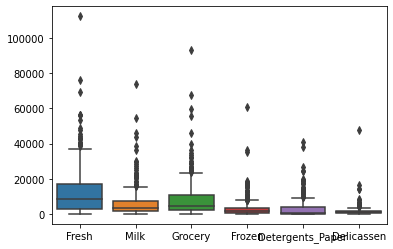

In [9]:
sns.boxplot(data[col_name])

In [10]:
median_=data.Fresh.median()
median_

8504.0

In [11]:
# Count of outliers in Fresh 
data[data['Fresh']>data['Fresh'].quantile(0.75)].Fresh.count()

110

In [12]:
# removing outliers form Fresh column
data['Fresh']=np.where(data['Fresh']>data['Fresh'].quantile(0.80),median_,data['Fresh'])

<AxesSubplot:>

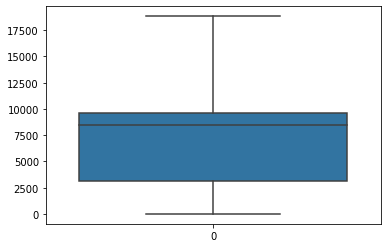

In [13]:
sns.boxplot(data['Fresh'])

In [14]:
# for Milk column outlier treatment
median_ = data['Milk'].median()
median_

3627.0

In [15]:
# counting the outliers in the Milk column
data[data['Milk']>data['Milk'].quantile(0.75)]['Milk'].count()

110

In [16]:
# Replacing the outliers with the median
data['Milk'] = np.where(data['Milk']>data['Milk'].quantile(0.80),median_,data['Milk'])


<AxesSubplot:>

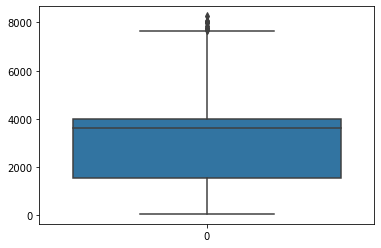

In [17]:
sns.boxplot(data['Milk'])

In [18]:
# For Grocery column outliers treatment
median_ = data['Grocery'].median()
q3 = data['Grocery'].quantile(0.75)
q1 = data['Grocery'].quantile(0.25)
iqr = q3-q1
uw = q3+1.5*iqr
median_

4755.5

In [19]:
# counting the no. of outliers in the Grocery column
data[data['Grocery']>uw]['Grocery'].count()

24

In [20]:
data['Grocery'] = np.where(data['Grocery']>uw,median_,data['Grocery'])


<AxesSubplot:>

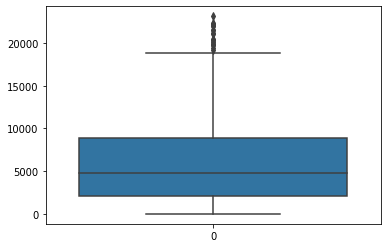

In [21]:
sns.boxplot(data['Grocery'])

In [22]:
data['Grocery'].skew()

1.2769438771365644

In [23]:
# For Frozen column
median_ = data['Frozen'].median()
median_

1526.0

In [24]:
# counting the no. of outliers in the data['Frozen']
data[data['Frozen']>data['Frozen'].quantile(0.80)]['Frozen'].count()

88

In [25]:
# Removing outliers from the data
data['Frozen']=np.where(data['Frozen']>data['Frozen'].quantile(0.80),median_,data['Frozen'])

<AxesSubplot:>

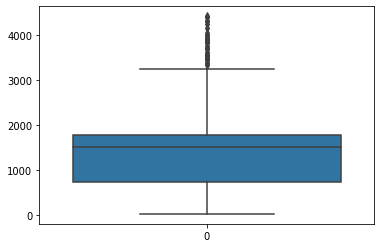

In [26]:
sns.boxplot(data['Frozen'])

In [28]:
data['Frozen'].skew()

0.8930266482792876

In [30]:
data[['Detergents_Paper','Delicassen']].skew()

Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [32]:
# Outlier treatment for column Detergents_Paper
median_ = data['Detergents_Paper'].median()
median_

816.5

In [33]:
# counting outliers in the data
data[data['Detergents_Paper']>data['Detergents_Paper'].quantile(0.80)]['Detergents_Paper'].count()

88

In [34]:
# Outliers treatment
data['Detergents_Paper']=np.where(data['Detergents_Paper']>data['Detergents_Paper'].quantile(0.80),median_,data['Detergents_Paper'])

In [35]:
data['Detergents_Paper'].skew()

1.7179795278475278

In [37]:
# for Delicassen column outliers treatment
median_ = data['Delicassen'].median()
median_

965.5

In [39]:
# counting no. of Outliers in Delicassen column
data[data['Delicassen']>data['Delicassen'].quantile(0.80)]['Delicassen'].count()

88

In [40]:
# Outlier treatment
data['Delicassen'] = np.where(data['Delicassen']>data['Delicassen'].quantile(0.80),median_,data['Delicassen'])

In [41]:
data['Delicassen'].skew()

0.3643420440262236

In [42]:
# Applying StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [43]:
# Applying StandardScaler to the columns 
data[col_name]=ss.fit_transform(data[col_name])

In [44]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,1.106602,0.179574,0.251637,-1.254303,1.423302,0.975853
1,2,3,-0.067612,0.179574,0.627928,0.302990,1.961235,1.839085
2,2,3,-0.214912,0.179574,0.274698,0.949850,2.155029,0.241711
3,1,3,1.231305,-1.052275,-0.374579,0.065573,-0.459895,1.862735
4,2,3,0.235148,1.083066,0.183578,2.468915,0.643779,0.241711


In [45]:
data.Channel.unique()

array([2, 1], dtype=int64)

In [46]:
data.Region.unique()

array([3, 1, 2], dtype=int64)

# Applying KMean clustering algorithm 

In [54]:
from sklearn.cluster import KMeans
km = KMeans()
km

KMeans()

# Spearating x 

In [56]:
x = data.iloc[:,:].values

In [57]:
x

array([[ 2.        ,  3.        ,  1.10660195, ..., -1.25430309,
         1.42330242,  0.97585284],
       [ 2.        ,  3.        , -0.06761213, ...,  0.30298987,
         1.96123466,  1.83908506],
       [ 2.        ,  3.        , -0.21491197, ...,  0.94984993,
         2.15502931,  0.24171129],
       ...,
       [ 2.        ,  3.        ,  1.49619329, ..., -1.02996437,
        -0.19092881,  2.01843239],
       [ 1.        ,  3.        ,  0.60883728, ..., -0.42535645,
        -0.75449756,  2.52691164],
       [ 1.        ,  3.        , -0.96103588, ..., -1.40419756,
        -0.48596596, -1.55866001]])

# Applying Kmean to x

In [58]:
km.fit(x)

KMeans()

In [59]:
# Finding Cluster center
km.cluster_centers_

array([[ 1.21538462,  2.93846154, -0.56033268,  0.48657976, -0.33253615,
        -0.30921724, -0.26033123,  0.31787706],
       [ 1.05263158,  2.89473684, -0.0891163 , -0.91022549, -0.71251112,
        -0.45200229, -0.49263809, -0.95364801],
       [ 1.8245614 ,  2.45614035, -0.72975663,  0.61398025,  1.86871396,
        -0.4574956 , -0.21799847,  0.05200835],
       [ 1.72916667,  2.6875    , -0.44357719,  0.7758318 ,  0.60147245,
        -0.3738407 ,  2.37500362,  0.05482956],
       [ 1.14583333,  1.02083333, -0.09251954, -0.21123772, -0.53533125,
        -0.10683068, -0.35092165, -0.34408275],
       [ 1.0862069 ,  2.62068966,  0.86505719, -0.57446814, -0.65625567,
         0.09015082, -0.59932999,  0.93341161],
       [ 1.04761905,  2.45238095,  0.31528376, -0.83791837, -0.61306519,
         1.9238287 , -0.44373503, -0.2787573 ],
       [ 1.60869565,  2.93478261,  1.02408693,  0.95573449,  0.64969105,
         0.381983  ,  0.50065247,  0.44140979]])

# Spliting x and y

In [47]:
x = data.drop('Channel',axis=1)
y = data['Channel']


# Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

# Applying Cross validataion with KFold 10

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=10)

array([0.86363636, 0.86363636, 0.79545455, 0.75      , 0.81818182,
       0.84090909, 0.84090909, 0.86363636, 0.86363636, 0.77272727])